In [1]:
import pandas as pd
import torch

In [2]:
df = pd.read_csv('추자도.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22184,2014-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.9,NaN,4.3
1,22184,2014-01-16,4.2,1029.6,60.0,4.4,14.6,1.0,0.6,0.9,1.4,3.3,4.3
2,22184,2014-01-17,3.7,1026.9,59.0,6.1,14.8,0.7,0.4,0.7,1.1,3.3,9.1
3,22184,2014-01-18,8.8,1028.5,66.0,5.8,14.9,2.8,1.8,2.7,4.2,5.3,7.1
4,22184,2014-01-19,3.8,1029.1,66.0,4.6,14.8,1.6,1.0,2.0,3.4,5.6,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,22184,2022-12-27,6.8,1028.8,63.0,5.6,16.1,1.3,0.8,1.0,1.5,3.7,4.6
3077,22184,2022-12-28,7.2,1030.4,59.0,5.6,16.0,1.6,1.0,1.3,2.3,4.5,5.8
3078,22184,2022-12-29,6.5,1032.6,59.0,4.9,16.1,1.5,0.9,1.1,1.9,4.7,6.4
3079,22184,2022-12-30,6.9,1032.3,53.0,5.8,16.2,1.5,0.9,1.2,2.0,4.3,4.9


In [3]:
df = df.rename(columns={'일시': 'date', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 최대 파고(m)':'wave(m)','평균 풍속(m/s)':'Wind(m/s)','평균기압(hPa)':'Apress(hPa)','평균 상대습도(%)':'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']] # Column 재정리
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2014-01-15,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-16,4.2,1029.6,60.0,4.4,14.6,1.0
2014-01-17,3.7,1026.9,59.0,6.1,14.8,0.7
2014-01-18,8.8,1028.5,66.0,5.8,14.9,2.8
2014-01-19,3.8,1029.1,66.0,4.6,14.8,1.6
...,...,...,...,...,...,...
2022-12-27,6.8,1028.8,63.0,5.6,16.1,1.3
2022-12-28,7.2,1030.4,59.0,5.6,16.0,1.6
2022-12-29,6.5,1032.6,59.0,4.9,16.1,1.5


In [4]:
df.dropna(subset=['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)'], inplace=True)
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2014-01-16,4.2,1029.6,60.0,4.4,14.6,1.0
2014-01-17,3.7,1026.9,59.0,6.1,14.8,0.7
2014-01-18,8.8,1028.5,66.0,5.8,14.9,2.8
2014-01-19,3.8,1029.1,66.0,4.6,14.8,1.6
2014-01-20,9.0,1022.0,64.0,7.6,14.6,3.3
...,...,...,...,...,...,...
2022-12-27,6.8,1028.8,63.0,5.6,16.1,1.3
2022-12-28,7.2,1030.4,59.0,5.6,16.0,1.6
2022-12-29,6.5,1032.6,59.0,4.9,16.1,1.5


In [5]:
correlation_matrix = df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']].corr()
correlation_matrix

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
Wind(m/s),1.000000,0.141623,-0.182456,-0.264948,-0.106591,0.866674
Apress(hPa),0.141623,1.000000,-0.732092,-0.745827,-0.563173,0.059979
Moisture(%),-0.182456,-0.732092,1.000000,0.575725,0.340739,-0.117370
Atemp(°C),-0.264948,-0.745827,0.575725,1.000000,0.877117,-0.219136
Stemp(°C),-0.106591,-0.563173,0.340739,0.877117,1.000000,-0.063471
wave(m),0.866674,0.059979,-0.117370,-0.219136,-0.063471,1.000000


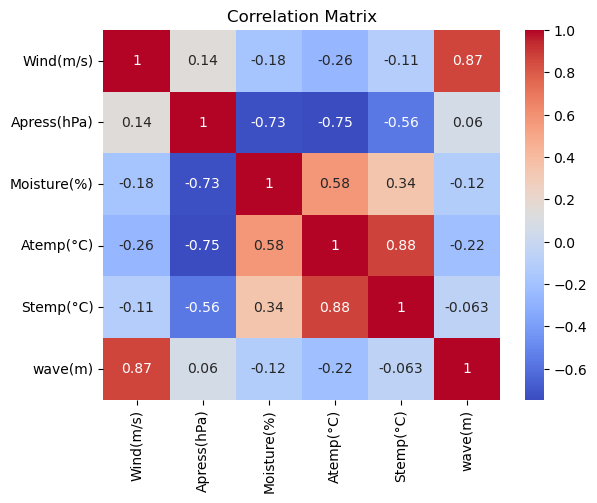

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
monthly_avg_temp = df['Stemp(°C)'].resample('M').mean()
monthly_avg_temp

date
2014-01-31    14.475000
2014-02-28    13.305000
2014-03-31    12.733333
2014-04-30    13.623077
2014-05-31    18.000000
                ...    
2022-08-31    28.250000
2022-09-30    24.710714
2022-10-31    20.574194
2022-11-30    18.079310
2022-12-31    16.151613
Freq: M, Name: Stemp(°C), Length: 108, dtype: float64

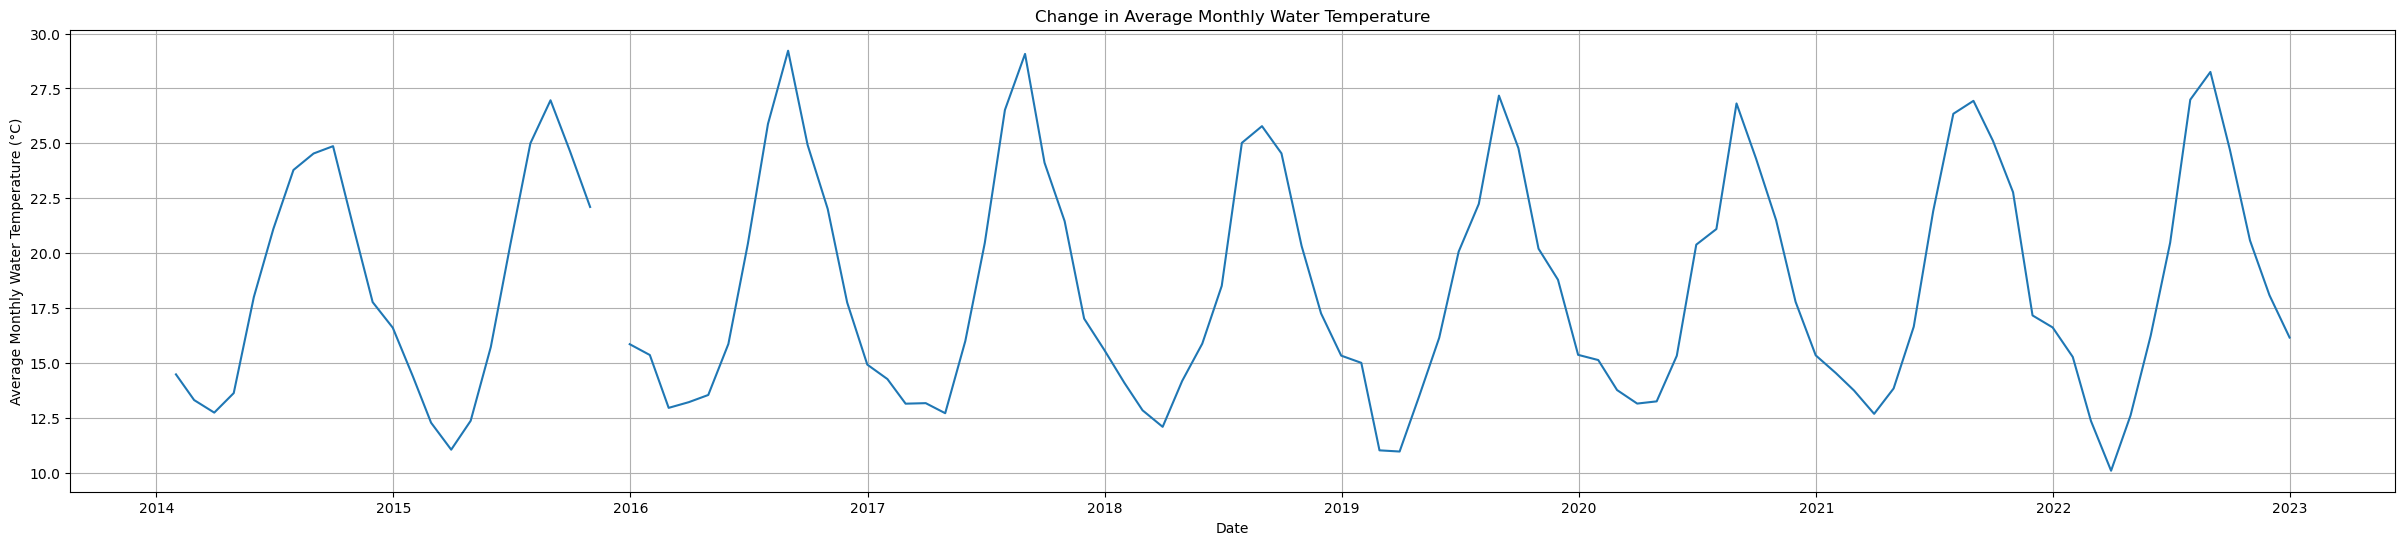

In [8]:
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

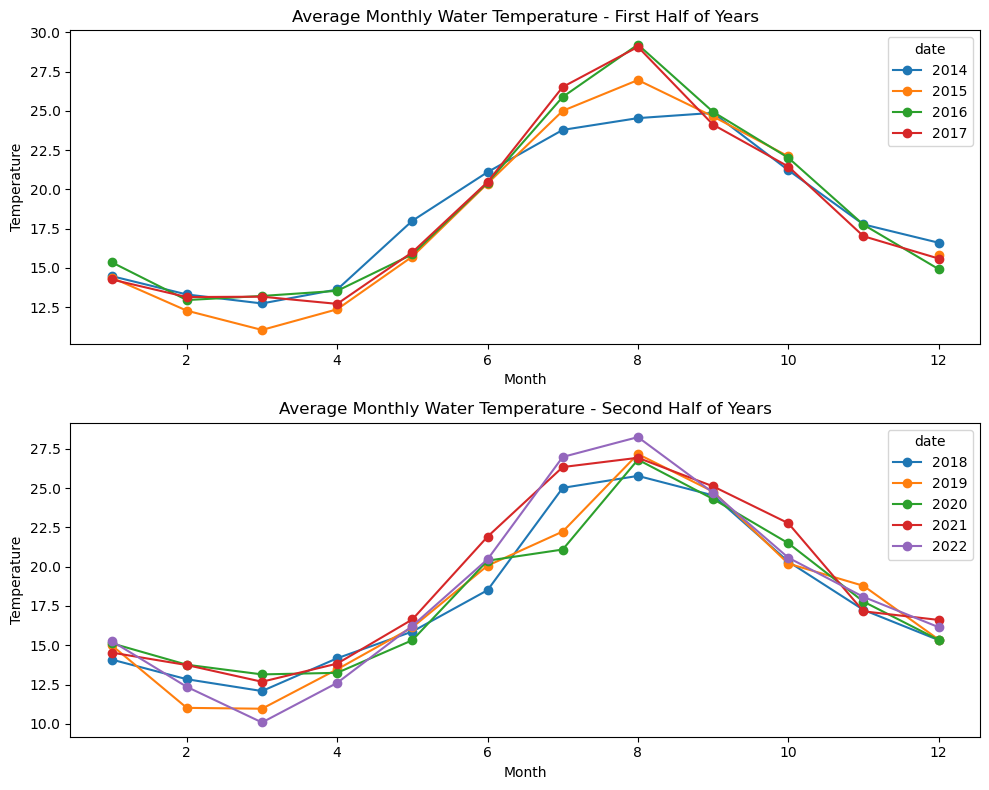

In [9]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Water Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Water Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


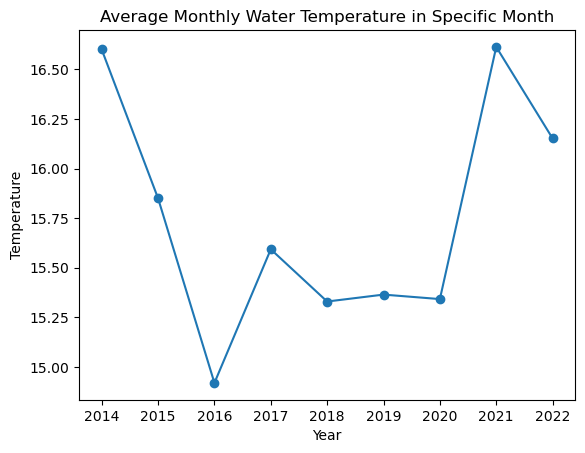

In [10]:
# Define the specific month you want to plot
target_month = 12  # August

# Filter the data for the specific month
specific_month_data = df[df.index.month == target_month]

# Group by year and calculate the average temperature
yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()

# Plot the average monthly water temperature for the specific month
yearly_avg_specific_month.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature in Specific Month')
plt.show()

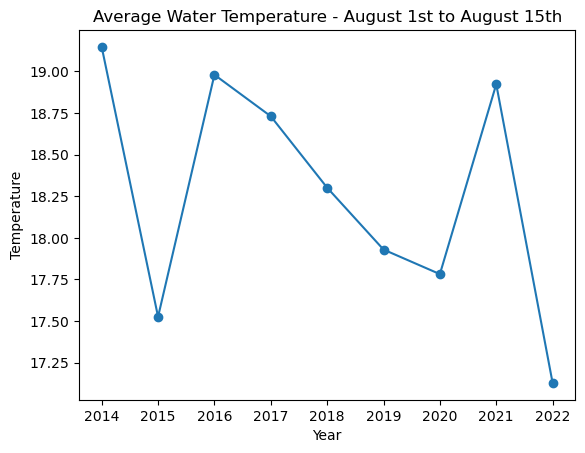

In [11]:

# Define the start and end dates for the range (August 1st to August 15th)
start_date = '2013-08-01'
end_date = '2022-08-15'

# Filter the data for the specified date range
date_range_data = df[(df.index >= start_date) & (df.index <= end_date)]

# Group by year and calculate the average temperature
yearly_avg_temp = date_range_data.groupby(date_range_data.index.year)['Stemp(°C)'].mean()

# Plot the average water temperature for the specified date range
yearly_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature - August 1st to August 15th')
plt.show()

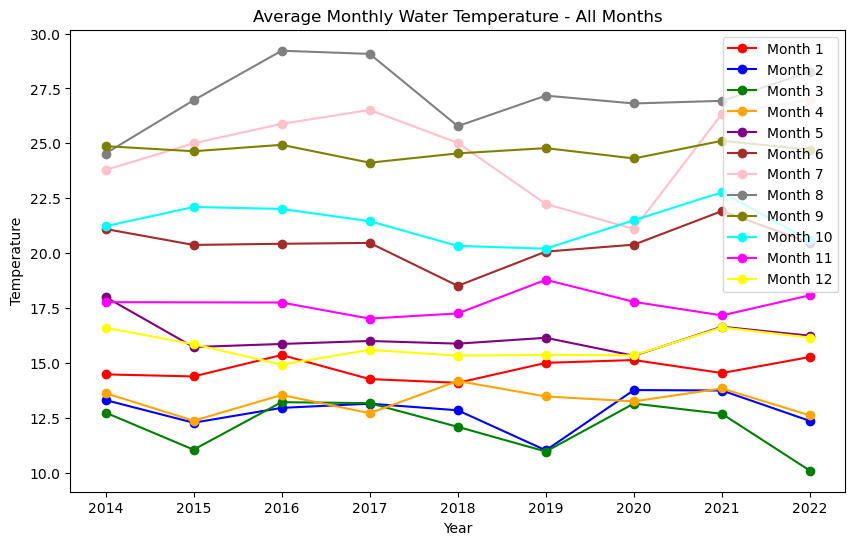

In [12]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


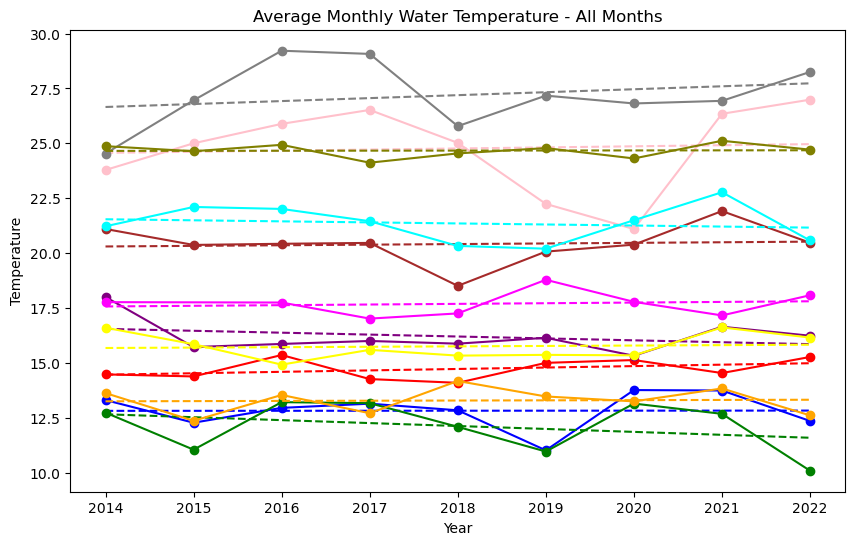

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 8 - Slope: 0.1346484371363401
2. Month 1 - Slope: 0.0652274812254652
3. Month 7 - Slope: 0.04963004803157598
4. Month 11 - Slope: 0.029518082815982536
5. Month 6 - Slope: 0.027410440613027158
6. Month 12 - Slope: 0.018533026113671264
7. Month 4 - Slope: 0.008851711506884003
8. Month 9 - Slope: 0.0036483305966065484
9. Month 2 - Slope: 0.0015191968525300103
10. Month 10 - Slope: -0.04755273054716886
11. Month 5 - Slope: -0.0869139784946238
12. Month 3 - Slope: -0.1336976621049203


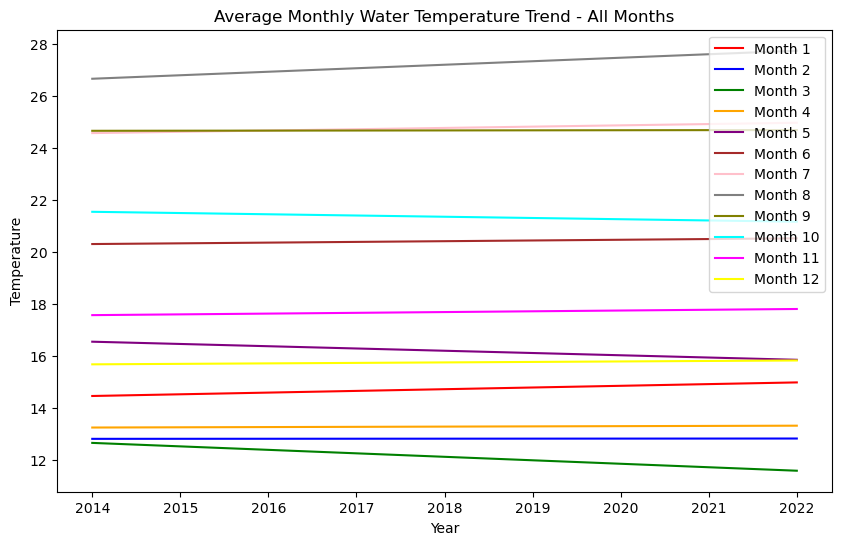

In [14]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


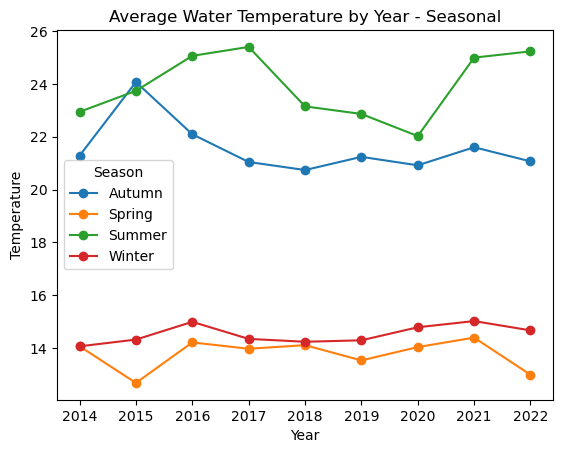

In [15]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

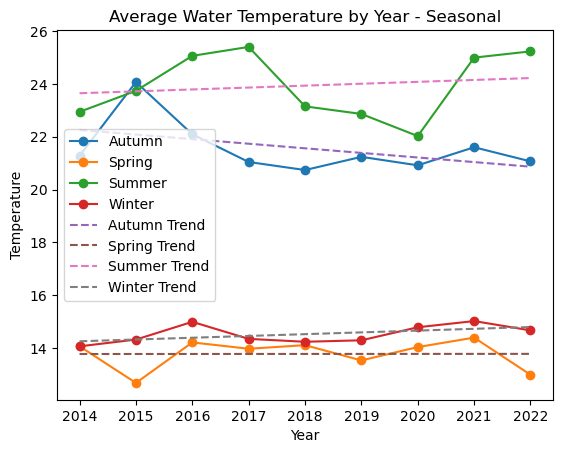

In [16]:

# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')

# Add trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.legend()
plt.show()


Order of trends by prominence:
1. Summer - Slope: 0.07195187114343991
2. Winter - Slope: 0.06758126277149056
3. Spring - Slope: 0.0006451346715444507
4. Autumn - Slope: -0.1739097085262508


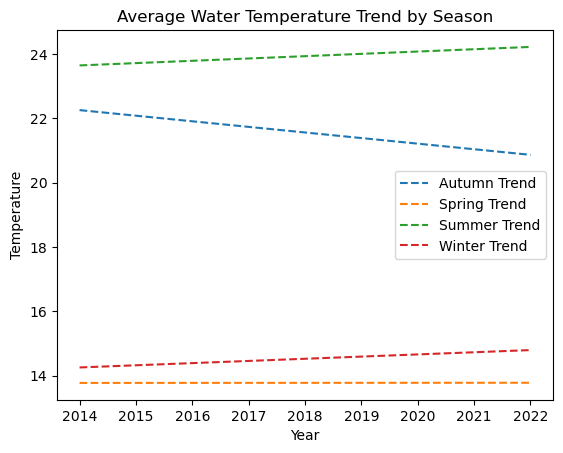

In [17]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Initialize a dictionary to store the slopes
slopes = {}

# Plot the trend lines for each season and calculate the slopes
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')
    slopes[season] = model.coef_[0]

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (season, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. {season} - Slope: {slope}")

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()
